# TRAINING

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import keras
from keras import layers

In [3]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  
])

C:\Users\LOAN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\eye_state"
train_datagen = ImageDataGenerator(validation_split=0.2)

train_generator = train_datagen.flow_from_directory( data_dir,
                                                     target_size=(32,32),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     class_mode='categorical',
                                                     subset='training')

validation_datagen = ImageDataGenerator(validation_split=0.2)

validation_generator =  validation_datagen.flow_from_directory( data_dir,
                                                                target_size=(32,32),
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                subset='validation')

Found 67919 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.


In [7]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,218 (176.63 KB)

 Trainable params: 45,218 (176.63 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = cnn_model.fit(train_generator, validation_data=validation_generator, epochs=10)

C:\Users\LOAN\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 218s 99ms/step - categorical_accuracy: 0.8423 - loss: 0.4991 - precision: 0.8423 - recall: 0.8423 - val_categorical_accuracy: 0.8914 - val_loss: 0.2662 - val_precision: 0.8914 - val_recall: 0.8914
Epoch 2/10
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 121s 57ms/step - categorical_accuracy: 0.9508 - loss: 0.1408 - precision: 0.9508 - recall: 0.9508 - val_categorical_accuracy: 0.9327 - val_loss: 0.1686 - val_precision: 0.9327 - val_recall: 0.9327
Epoch 3/10
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 125s 59ms/step - categorical_accuracy: 0.9636 - loss: 0.1029 - precision: 0.9636 - recall: 0.9636 - val_categorical_accuracy: 0.9229 - val_loss: 0.1896 - val_precision: 0.9229 - val_recall: 0.9229
Epoch 4/10
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 125s 59ms/step - categorical_accuracy: 0.9706 - loss: 0.0848 - precision: 0.9706 - recall: 0.9706 - val_categorical_accuracy: 0.9220 - val_loss: 0.2041 - val_precision: 0.9220 - val_recall: 0.9220
Epoch 5/10
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 12

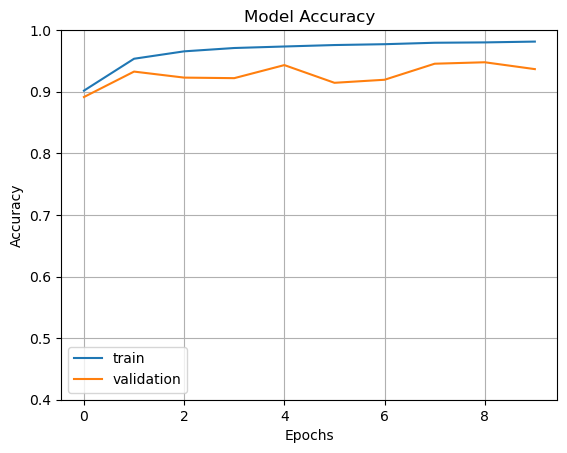

In [11]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [13]:
model.evaluate(validation_generator, return_dict=True)

NameError: name 'model' is not defined

In [14]:
cnn_model.save(r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\drowsiness_cnn.h5")

# Drowsiness detection

In [15]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time

mixer.init()
sound = mixer.Sound(r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\alarm.wav.mp3")

face = cv2.CascadeClassifier(r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\haarcascade_frontalface_alt.xml")
leye = cv2.CascadeClassifier(r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\haarcascade_lefteye_2splits.xml")
reye = cv2.CascadeClassifier(r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\haarcascade_righteye_2splits.xml")

lbl = ['Close', 'Open']
model = load_model(r"C:\Users\LOAN\Downloads\ML\Drowsiness Detection\copy_drowsiness_cnn.h5")
path = os.getcwd()
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count = 0
score = 0
thicc = 2
rpred = [99]
lpred = [99]

while (True):
    ret, frame = cap.read()
    height, width = frame.shape[:2]

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Sử dụng màu xám cho phát hiện mắt

    faces = face.detectMultiScale(gray, minNeighbors=5, scaleFactor=1.1, minSize=(25, 25))
    left_eye = leye.detectMultiScale(gray)
    right_eye = reye.detectMultiScale(gray)

    cv2.rectangle(frame, (0, height - 50), (200, height), (0, 0, 0), thickness=cv2.FILLED)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (100, 100, 100), 1)

    if len(right_eye) > 0:  # Kiểm tra xem có phát hiện mắt phải không
        for (x, y, w, h) in right_eye:
            r_eye = frame[y:y + h, x:x + w]
            r_eye = cv2.cvtColor(r_eye, cv2.COLOR_BGR2RGB)
            r_eye = cv2.resize(r_eye, (32, 32))
            r_eye = r_eye.reshape((-1, 32, 32, 3))

            rpred = np.argmax(model.predict(r_eye), axis=-1)
            print("Right Eye Prediction:", rpred)  # Thêm thông báo để theo dõi giá trị
            break

    if len(left_eye) > 0:  # Kiểm tra xem có phát hiện mắt trái không
        for (x, y, w, h) in left_eye:
            l_eye = frame[y:y + h, x:x + w]
            l_eye = cv2.cvtColor(l_eye, cv2.COLOR_BGR2RGB)
            l_eye = cv2.resize(l_eye, (32, 32))
            l_eye = l_eye.reshape((-1, 32, 32, 3))

            lpred = np.argmax(model.predict(l_eye), axis=-1)
            print("Left Eye Prediction:", lpred)  # Thêm thông báo để theo dõi giá trị
            break

    if (rpred[0] == 0 and lpred[0] == 0):
        score += 1
        cv2.putText(frame, "Closed", (10, height - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA)
    else:
        score -= 1
        cv2.putText(frame, "Open", (10, height - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA)

    if (score < 0):
        score = 0
    cv2.putText(frame, 'Score:' + str(score), (100, height - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA)

    if (score > 12):
        cv2.putText(frame, "ALERT: DROWSY!", (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 4, cv2.LINE_AA)
        cv2.imwrite(os.path.join(path, 'image.jpg'), frame)
        try:
            sound.play()
        except:  # isplaying = False
            pass

        if (thicc < 16):
            thicc += 2
        else:
            thicc -= 2
            if (thicc < 2):
                thicc = 2
        cv2.rectangle(frame, (0, 0), (width, height), (0, 0, 255), thicc)

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


pygame 2.6.1 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Right Eye Prediction: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Left Eye Prediction: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Right Eye Prediction: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Left Eye Prediction: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Right Eye Prediction: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Left Eye Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Right Eye Prediction: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Left Eye Prediction: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Right Eye Prediction: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Left Eye Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Right Eye Prediction: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Left Eye Prediction: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Right Eye Prediction: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Left Eye Prediction: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Right Eye Prediction: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Left Eye